# Image Processing
I'm just posting some image processing methods here. Everything I can to be honest, as a storage for *knowledge*. <br><br>

Colorful pictures are made by Zou Chuan An.
Grayscale pics are a grayscale versions of Gu Wenda paintings.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [11]:
image = cv2.imread('Dataset/Dataset/Zou_Chuan_An/Zou_Chuan_An_09.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_copy = image.copy()

image_gray = cv2.imread('Dataset/Dataset/Gu_Wenda/Gu_Wenda_01.jpg')
image_gray = cv2.cvtColor(image_gray, cv2.COLOR_BGR2GRAY)
image_gray_copy = image_gray.copy()

# *Point operators*

Most basic type of image processing. Based on pixel of an image. Examples: brightness and contrast adjustment.

In [15]:
color = ('r','g','b')

def plot_histogram(img, plt, isColor):
    if isColor:
        for i, col in enumerate(color):
            histr = cv2.calcHist([img],[i],None,[256],[0,256])
            plt.plot(histr,color = col)
            plt.xlim([0,256])
    else:
        histr = cv2.calcHist([img],[0],None,[256],[0,256])
        plt.plot(histr)
        plt.xlim([0,256])

## Pixel transformation
Pictures with histograms for the original one, brightness increased and contrast increased.
Changes image can be described as: <br> <br>
g(x) = af(x) + b; 
<br><br>
where a is the alpha -> a value for contrast change, b for brightness.
<br><br>
If alpha is between (0, 1), contrast is decreased. Default value is 1. More means increasing. <br><br>
b range is <-127, 127>, 0 is the default.

## Colorful image

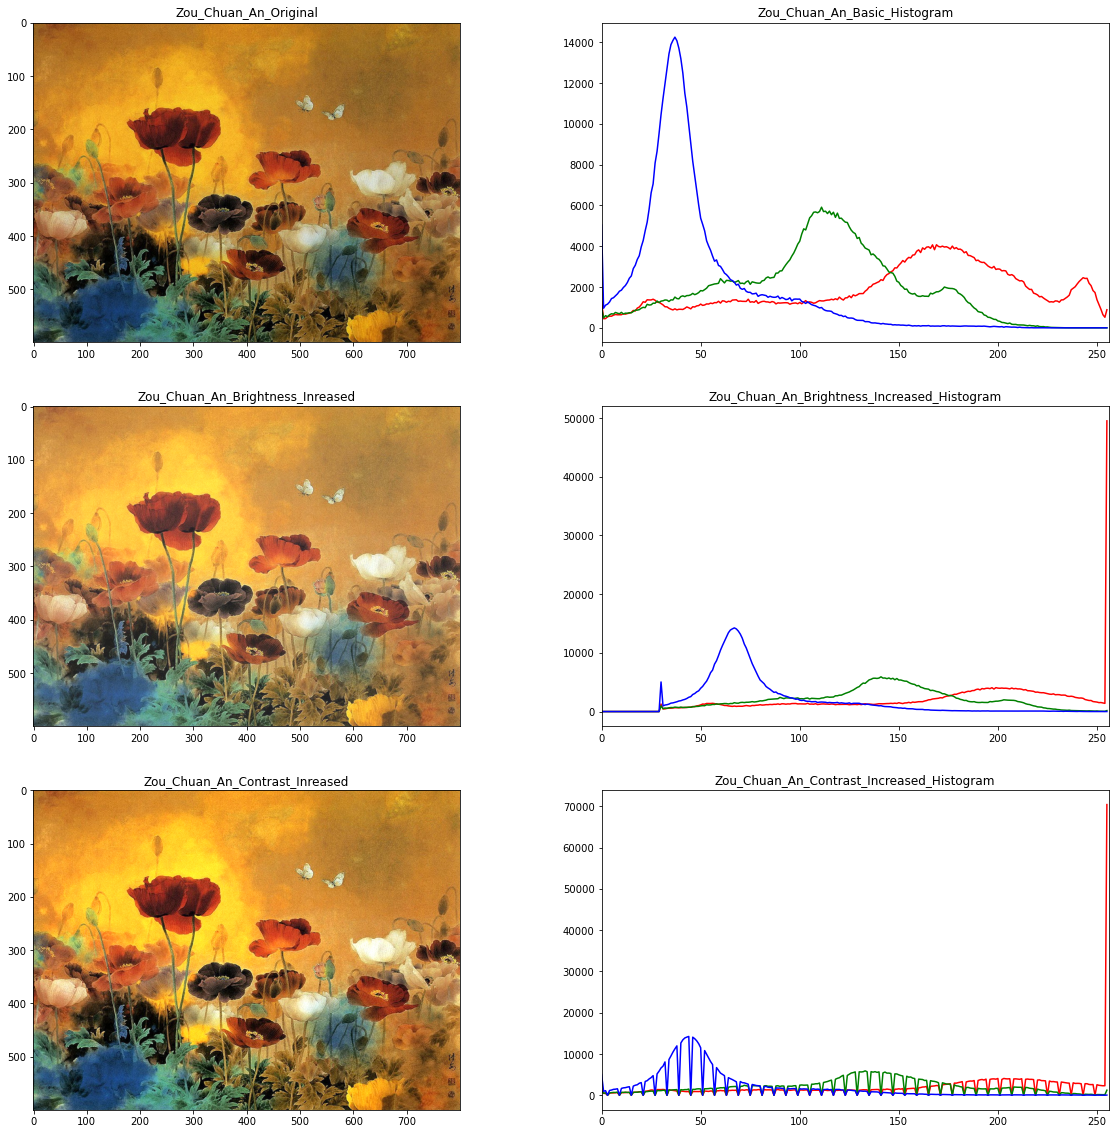

In [16]:
plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
plt.title("Zou_Chuan_An_Original")
plt.imshow(image)

plt.subplot(3, 2, 2)
plt.title("Zou_Chuan_An_Basic_Histogram")
plot_histogram(image, plt, True)

plt.subplot(3, 2, 3)
plt.title("Zou_Chuan_An_Brightness_Inreased")
brighter_image = cv2.convertScaleAbs(image_copy, alpha=1, beta=30)
plt.imshow(brighter_image)

plt.subplot(3, 2, 4)
plt.title("Zou_Chuan_An_Brightness_Increased_Histogram")
plot_histogram(brighter_image, plt, True)

plt.subplot(3, 2, 5)
plt.title("Zou_Chuan_An_Contrast_Inreased")
contrast_image =  cv2.convertScaleAbs(image_copy, alpha=1.2, beta=0)
plt.imshow(contrast_image)

plt.subplot(3, 2, 6)
plt.title("Zou_Chuan_An_Contrast_Increased_Histogram")
plot_histogram(contrast_image, plt, True)

plt.show()

## Grayscale image

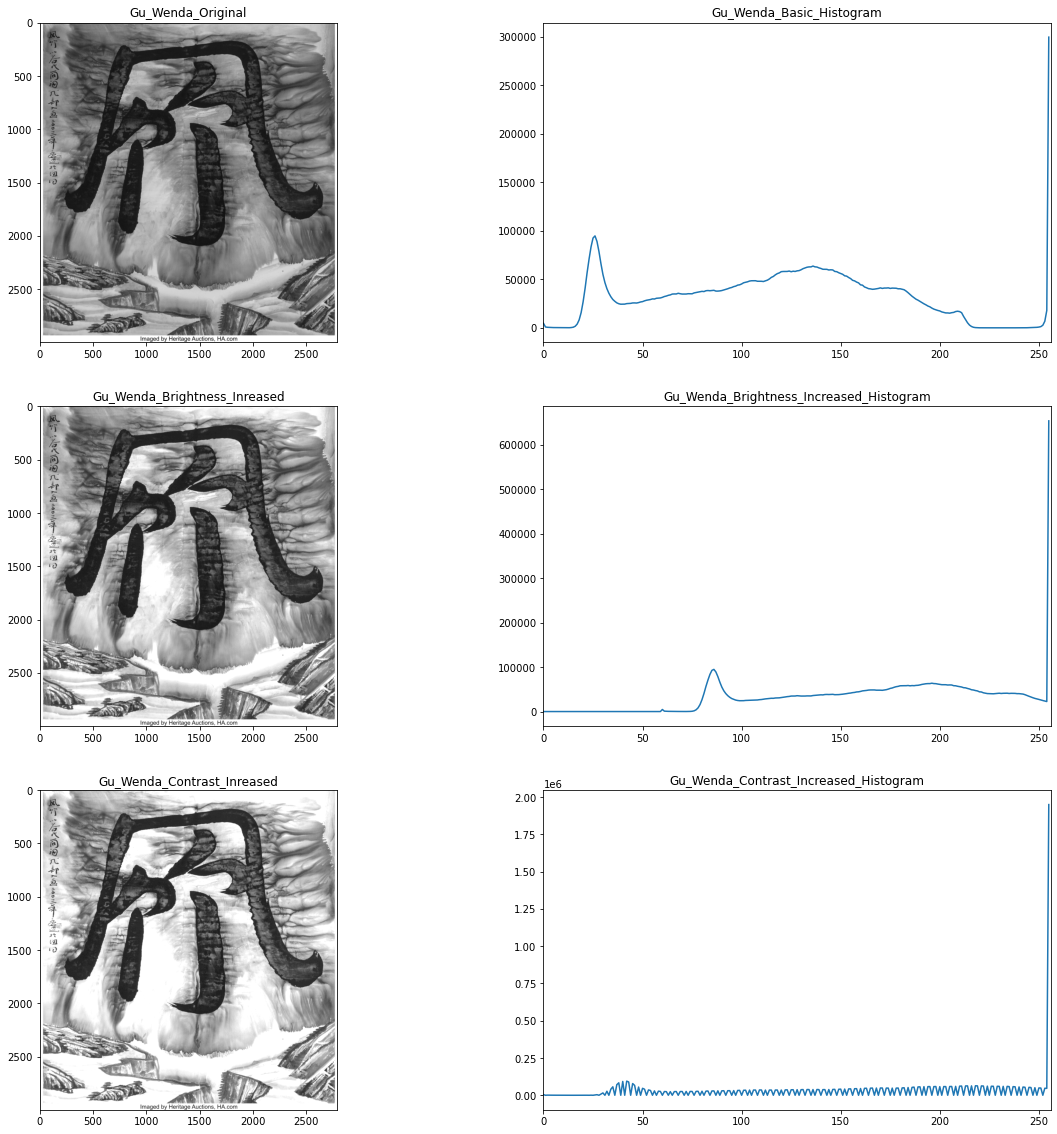

In [20]:
plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
plt.title("Gu_Wenda_Original")
plt.imshow(image_gray, cmap='gray')

plt.subplot(3, 2, 2)
plt.title("Gu_Wenda_Basic_Histogram")
plot_histogram(image_gray, plt, False)

plt.subplot(3, 2, 3)
plt.title("Gu_Wenda_Brightness_Inreased")
brighter_image_gray = cv2.convertScaleAbs(image_gray_copy, alpha=1, beta=60)
plt.imshow(brighter_image_gray, cmap='gray')

plt.subplot(3, 2, 4)
plt.title("Gu_Wenda_Brightness_Increased_Histogram")
plot_histogram(brighter_image_gray, plt, False)

plt.subplot(3, 2, 5)
plt.title("Gu_Wenda_Contrast_Inreased")
contrast_image_gray =  cv2.convertScaleAbs(image_gray_copy, alpha=1.6, beta=0)
plt.imshow(contrast_image_gray, cmap='gray')

plt.subplot(3, 2, 6)
plt.title("Gu_Wenda_Contrast_Increased_Histogram")
plot_histogram(contrast_image_gray, plt, False)

plt.show()

## Histogram equalization
To find an intensity mapping function f(I) such that the resulting histogram is flat.
<br><br>
A truly *f l a t* image.
<br><br>
Seriously, it's literally flat. That's why it looks flat.
<br><br>
~ Cumulative distribution function ~
<br>
c(I) = 1/N * sum(h(i)) for each pixel; where <br>
h(I) is a distribution from histogram
N is the size of a picture
<br><br>
Cv2 equalizeHist works only for greyscale pics, so remember to split it for channels and then merge. This, however, can return some artifacts.
<br><br>
That's why you should use Contrast Limited Adaptive Histogram Equalization (CLAHE), which uses  <br> ~ moving window ~
<br><br>
As you can see on pics below, equalizeHist didn't really lower the high ones - just made the average, by almost zeroing some values.

## Color image

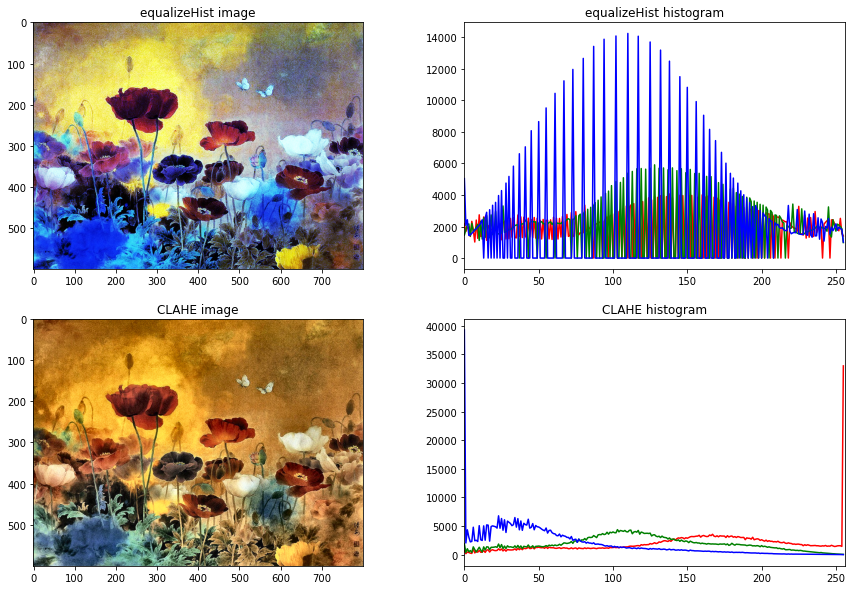

In [23]:
R, G, B = cv2.split(image_copy)

output_R = cv2.equalizeHist(R)
output_G = cv2.equalizeHist(G)
output_B = cv2.equalizeHist(B)

equalized = cv2.merge((output_R, output_G, output_B))

lab = cv2.cvtColor(image_copy, cv2.COLOR_RGB2LAB)
lab_planes = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
lab_planes[0] = clahe.apply(lab_planes[0])
lab = cv2.merge(lab_planes)
equalized_clahe = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
plt.title("equalizeHist image")
plt.imshow(equalized)

plt.subplot(2,2,2)
plt.title("equalizeHist histogram")
plot_histogram(equalized, plt, True)

plt.subplot(2,2,3)
plt.title("CLAHE image")
plt.imshow(equalized_clahe)

plt.subplot(2,2,4)
plt.title("CLAHE histogram")
plot_histogram(equalized_clahe, plt, True)

plt.show()

## Grayscale image

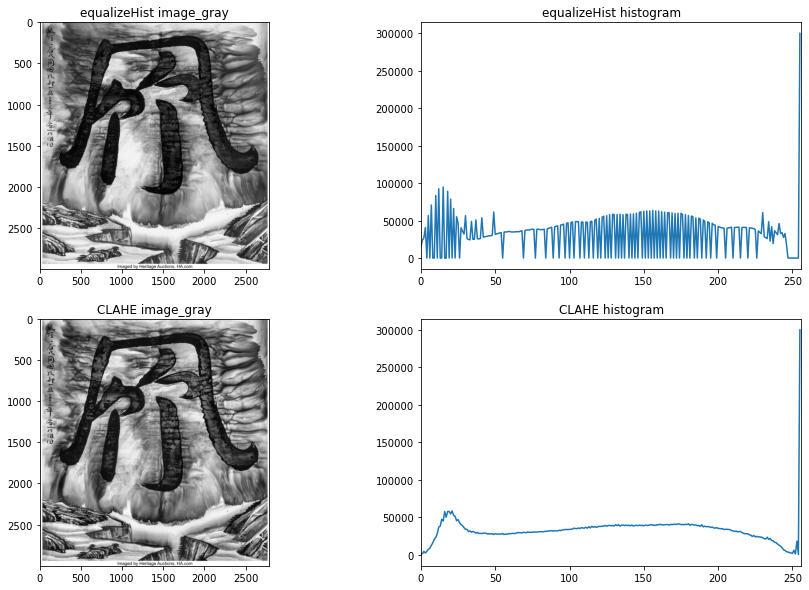

In [27]:
equalized = cv2.equalizeHist(image_gray_copy)

clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
equalized_clahe = clahe.apply(image_gray_copy)

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
plt.title("equalizeHist image_gray")
plt.imshow(equalized, cmap='gray')

plt.subplot(2,2,2)
plt.title("equalizeHist histogram")
plot_histogram(equalized, plt, False)

plt.subplot(2,2,3)
plt.title("CLAHE image_gray")
plt.imshow(equalized_clahe, cmap='gray')

plt.subplot(2,2,4)
plt.title("CLAHE histogram")
plot_histogram(equalized_clahe, plt, False)

plt.show()

# *Linear Filtering*
Linear filter: anoutput pixel’s value is determined as a weighted sum of input pixel values.
<br><br>
g(i, j) = sum(f(i + k, j + l) * h(k, l)); where 
<br><br>
Filter coefficients: <br>
k - weight kernel <br>
h(k, l) - mask <br>
<br><br>
so... <br>
f(x, y) is some place on a picture <br>
h(x, y) is a mask <br>
g(x, y) is an output! <br>

It's depending on a *neighborhood*. <br><br>
Correlation and convolution are linear shift-invariant (LSI) operators, which obey both the superposition principle and shift invariance principle (it behaves the same
everywhere)
<br><br>
FYI : <br>
bilinear filter: <br>
1 2 1 <br>
2 4 2 <br>
1 2 1 <br>
corner filter: <br>
1 -2 1 <br>
-2 4 -2 <br>
1 -2 1 <br>

## Color image

<ipython-input-63-607bbd125347>:50: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4, 2, 7)


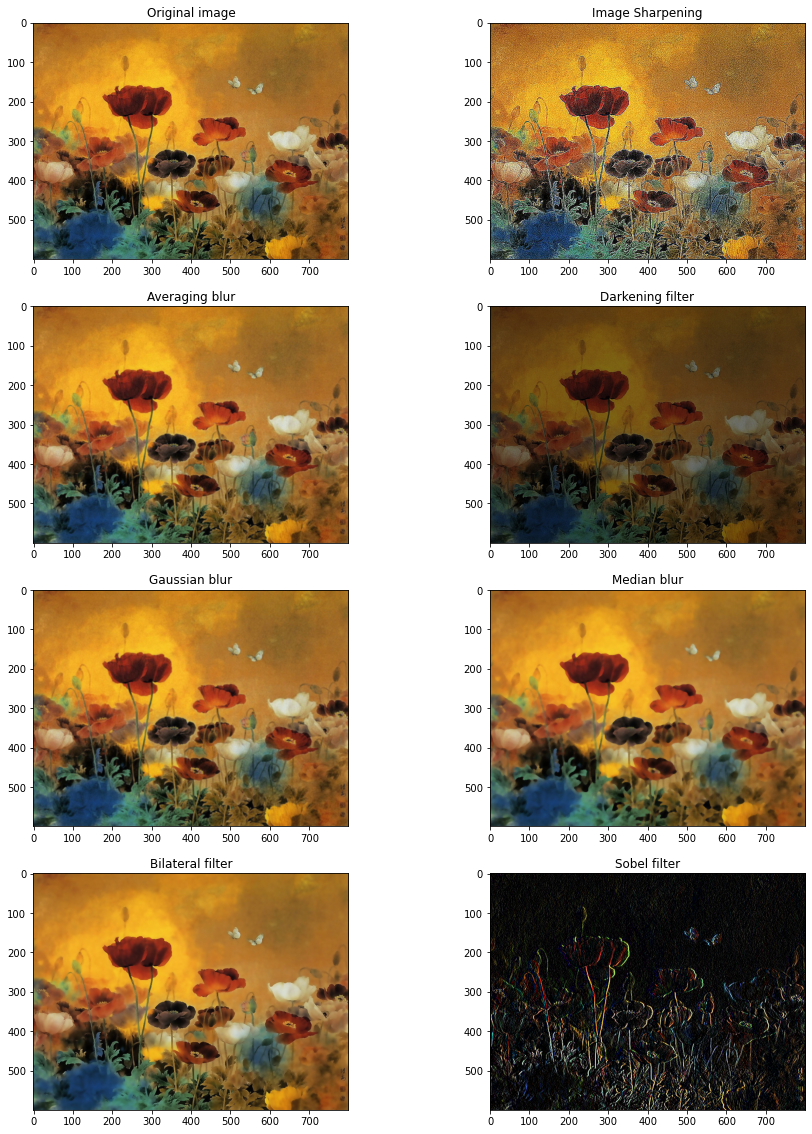

In [63]:
sharpening = np.array([[-1,-1,-1], 
                        [-1,9,-1], 
                       [-1,-1,-1]])
average_blur = np.array([[1/9, 1/9, 1/9], 
                        [1/9, 1/9, 1/9], 
                        [1/9, 1/9, 1/9]])
darker = np.array([[-0.1, 0.1, -0.1], 
                        [0.1, 0.5, 0.1], 
                       [-0.1, 0.1, -0.1]])
sobel = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])
sharp_filter = cv2.filter2D(image_copy, -1, sharpening)
blur_filter = cv2.filter2D(image_copy, -1, average_blur)
darker_filter = cv2.filter2D(image_copy, -1, darker)
sobel_filter = cv2.filter2D(image_copy, -1, sobel)
gaussian_blur = cv2.GaussianBlur(image_copy,(5, 5), 0)
median_blur = cv2.medianBlur(image_copy, 7)
bilateral = cv2.bilateralFilter(image_copy, 9, 75, 75)

plt.figure(figsize=(15, 20))
plt.subplot(4, 2, 1)
plt.title("Original image")
plt.imshow(image_copy)

plt.subplot(4, 2, 2)
plt.title("Image Sharpening")
plt.imshow(sharp_filter)

plt.subplot(4, 2, 3)
plt.title("Averaging blur")
plt.imshow(blur_filter)

plt.subplot(4, 2, 4)
plt.title("Darkening filter")
plt.imshow(darker_filter)

plt.subplot(4, 2, 5)
plt.title("Gaussian blur")
plt.imshow(gaussian_blur)

plt.subplot(4, 2, 6)
plt.title("Median blur")
plt.imshow(median_blur)

plt.subplot(4, 2, 7)
plt.title("Bilateral filter")
plt.imshow(bilateral)

plt.subplot(4, 2, 7)
plt.title("Bilateral filter")
plt.imshow(bilateral)

plt.subplot(4, 2, 8)
plt.title("Sobel filter")
plt.imshow(sobel_filter)

plt.show()

## Grayscale image

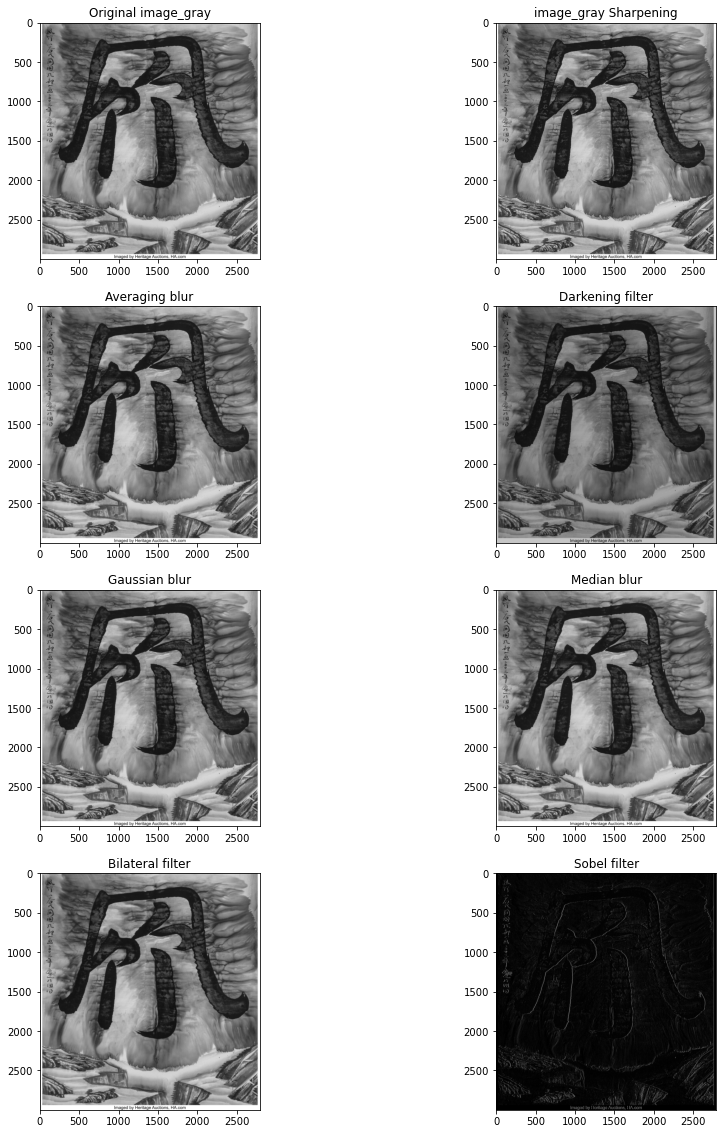

In [66]:
sharpening = np.array([[-1,-1,-1], 
                        [-1,9,-1], 
                       [-1,-1,-1]])
average_blur = np.array([[1/9, 1/9, 1/9], 
                        [1/9, 1/9, 1/9], 
                        [1/9, 1/9, 1/9]])
darker = np.array([[-0.1, 0.1, -0.1], 
                        [0.1, 0.5, 0.1], 
                       [-0.1, 0.1, -0.1]])
sobel = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])
sharp_filter = cv2.filter2D(image_gray_copy, -1, sharpening)
blur_filter = cv2.filter2D(image_gray_copy, -1, average_blur)
darker_filter = cv2.filter2D(image_gray_copy, -1, darker)
sobel_filter = cv2.filter2D(image_gray_copy, -1, sobel)
gaussian_blur = cv2.GaussianBlur(image_gray_copy,(5, 5), 0)
median_blur = cv2.medianBlur(image_gray_copy, 7)
bilateral = cv2.bilateralFilter(image_gray_copy, 9, 75, 75)

plt.figure(figsize=(15, 20))
plt.subplot(4, 2, 1)
plt.title("Original image_gray")
plt.imshow(image_gray_copy, cmap='gray')

plt.subplot(4, 2, 2)
plt.title("image_gray Sharpening")
plt.imshow(sharp_filter, cmap='gray')

plt.subplot(4, 2, 3)
plt.title("Averaging blur")
plt.imshow(blur_filter, cmap='gray')

plt.subplot(4, 2, 4)
plt.title("Darkening filter")
plt.imshow(darker_filter, cmap='gray')

plt.subplot(4, 2, 5)
plt.title("Gaussian blur")
plt.imshow(gaussian_blur, cmap='gray')

plt.subplot(4, 2, 6)
plt.title("Median blur")
plt.imshow(median_blur, cmap='gray')

plt.subplot(4, 2, 7)
plt.title("Bilateral filter")
plt.imshow(bilateral, cmap='gray')

plt.subplot(4, 2, 8)
plt.title("Sobel filter")
plt.imshow(sobel_filter, cmap='gray')

plt.show()